In [96]:
from keras import layers 
from keras import models 
import tensorflow as tf
import cv2
import numpy as np 
import os 
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [97]:
# Dataset path
# Path to dataset
dataset_path = "C:\\MachineLearn\\Brain MRI images for Brain Tumour DecMain\\brain_tumor_dataset"
dataset_path


'C:\\MachineLearn\\Brain MRI images for Brain Tumour DecMain\\brain_tumor_dataset'

In [98]:
# Classes
classes = ['yes', 'no']


In [99]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [100]:
# Initialize lists to store data and labels
images = []
labels = []


In [101]:
## Load and preprocess images
for class_index, class_name in enumerate(classes):
    class_folder = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        # Read the image
        image = cv2.imread(img_path)
        if image is not None:
            # Resize to a fixed size (e.g., 128x128)
            image = cv2.resize(image, (128, 128))
            images.append(image)
            labels.append(class_index)  # 0 for 'no', 1 for 'yes'


In [102]:
# Convert lists to NumPy arrays
images = np.array(images, dtype='float32')
labels = np.array(labels)


In [103]:
# Normalize the images to the range [0, 1]
images = images / 255.0


In [104]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Check the shapes of the splits
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (201, 128, 128, 3), y_train shape: (201,)
X_test shape: (51, 128, 128, 3), y_test shape: (51,)


In [105]:
# Build the CNN model
# Build the CNN model
model = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(62,(3,3), activation='relu' ),
    MaxPooling2D((2,2)),
    
    # Convolutional layer 3
    #Conv2D(128, (3, 3), activation='relu'),
    #MaxPooling2D((2, 2)),
    
    # Convolutional layer 3
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Flatten and fully connected layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (yes/no)
])


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [107]:
# Summary of the model
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 61, 61, 62)     │        17,918 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 62)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 256)    │       143,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,007,487 (49.62 MB)

 Trainable params: 13,007,487 (49.62 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.1,  # Use 20% of the training data for validation
    batch_size=32
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6034 - loss: 1.3596 - val_accuracy: 0.6667 - val_loss: 0.6808
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7116 - loss: 0.6509 - val_accuracy: 0.5238 - val_loss: 0.6314
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7384 - loss: 0.5366 - val_accuracy: 0.7143 - val_loss: 0.6144
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7326 - loss: 0.5740 - val_accuracy: 0.7619 - val_loss: 0.5739
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8415 - loss: 0.4428 - val_accuracy: 0.8095 - val_loss: 0.6017
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8067 - loss: 0.4722 - val_accuracy: 0.7619 - val_loss: 0.6195
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8144 - loss: 0.4094 - val_accuracy: 0.7143 - val_loss: 0.6694
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8577 - loss: 0.3327 - val_accuracy: 0.8095 - val_loss: 0.6377
Epoch 9/

In [109]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 0.8094 - loss: 0.5710
Test Accuracy: 82.35%


In [110]:
# Get predictions for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary class (0 or 1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 425ms/step


In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=classes))


              precision    recall  f1-score   support

         yes       0.96      0.74      0.84        31
          no       0.70      0.95      0.81        20

    accuracy                           0.82        51
   macro avg       0.83      0.85      0.82        51
weighted avg       0.86      0.82      0.83        51



In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[23  8]
 [ 1 19]]


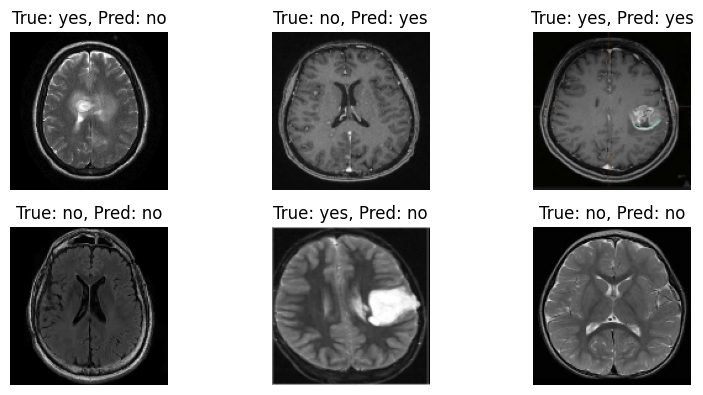

In [113]:
import matplotlib.pyplot as plt

# Display a few test images with predictions
plt.figure(figsize=(8, 6))
for i in range(6):  # Show 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])  # Display the image
    plt.title(f"True: {classes[y_test[i]]}, Pred: {classes[y_pred[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()